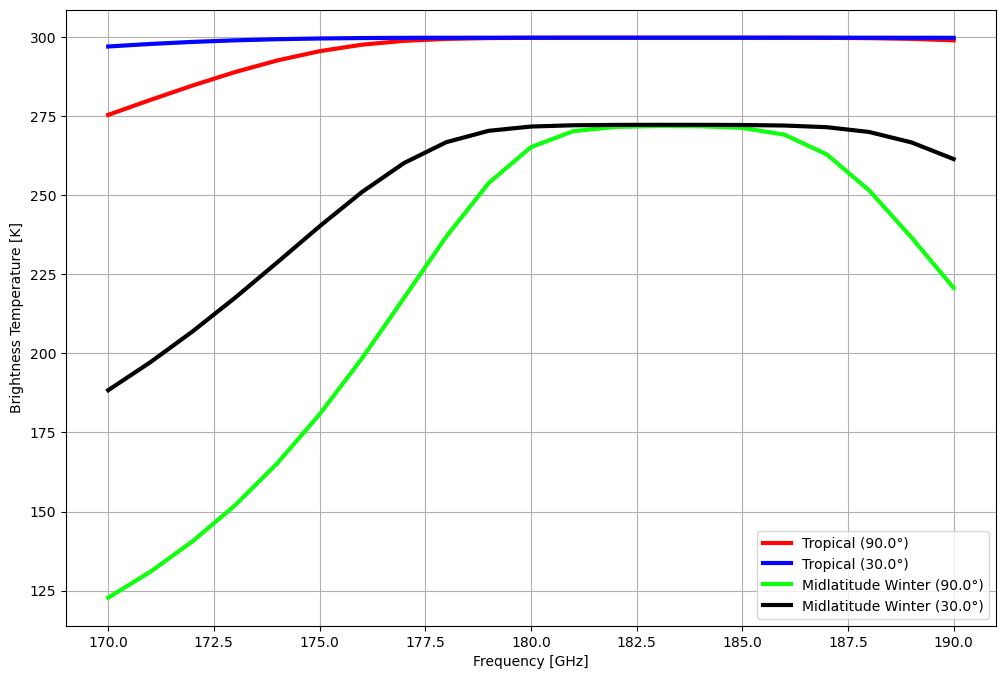

In [2]:
"""
Paper Example 1 
"""

import numpy as np
import matplotlib.pyplot as plt

from pyrtlib.climatology import AtmosphericProfiles as atmp

from pyrtlib.tb_spectrum import TbCloudRTE

from pyrtlib.utils import ppmv2gkg, mr2rh

colors = ['#ff0405', '#0404ff', '#0fff0e', '#000000']

atms = [atmp.TROPICAL, atmp.MIDLATITUDE_WINTER]
#atmp(AtmosphericProfiles) 

cnt = 0

for atm in atms:
    z, p, _, t, md = atmp.gl_atm(atm)
    gkg = ppmv2gkg(md[:, atmp.H2O], atmp.H2O)
    rh = mr2rh(p, t, gkg)[0] / 100
    frq = np.arange(170, 191, 1)
    ang = np.array([90., 30.])

    for a in ang:
        rte = TbCloudRTE(z, p, t, rh, frq, np.array([a]))

        rte.init_absmdl('R16')
        #change from R195D to R16
        #BC: a warn: "Use the more recent model by Rosenkranz, 2015, from R16 model onwards"

        rte.satellite = False
        
        df = rte.execute()

        df = df.set_index(frq)
        df.tbtotal.plot(figsize=(12, 8), xlabel="Frequency [GHz]", ylabel="Brightness Temperature [K]",
                        label=atmp.atm_profiles()[atm] + ' (' + str(a) + '°)', lw=3, legend=True,
                        color=colors[cnt], grid=True)
        cnt += 1

plt.show()


In [3]:
atms = [atmp.TROPICAL, atmp.MIDLATITUDE_WINTER]
#atms == [0, 2]

"""
atmp(AtmosphericProfiles) have 
TROPICAL = 0
MIDLATITUDE_SUMMER = 1
MIDLATITUDE_WINTER = 2
SUBARCTIC_SUMMER = 3
SUBARCTIC_WINTER = 4
US_STANDARD = 5

H2O = 0
CO2 = 1
O3 = 2
N2O = 3
CO = 4
CH4 = 5
O2 = 6

so atmp.TROPICAL = atmp.H2O = 0
"""
print(atmp.TROPICAL, atmp.H2O)

0 0


In [10]:
z, p, den, t, md = atmp.gl_atm(atms[0])
"""
atmp.gl_atm: 

    input: int. for Atmospheric model(0~5)

    returns: Tuple[numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray]: 
            * z (numpy.ndarray): Altitudes (km) (50x1)
            * p (numpy.ndarray): Pressure (mbar)
            * d (numpy.ndarray): Total density (cm-3)
            * t (numpy.ndarray): Temperature (K)
            * md (numpy.ndarray): Molecular densities (ppmv) 

            * 0 (H2O),
            * 1 (CO2),
            * 2 (O3),
            * 3 (N2O),
            * 4 (CO),
            * 5 (CH4),
            * 6 (O2)
            
Each of these profile contains data at 50 atmospheric levels.
Altitude (km), Pressure (mb), Density (cm-3), Molec. densities (ppmv):

md
"""
#!z_str, p_str, t_str, rh_str, md_str = atmp.gl_atm("Tropical") not work!
#print(len(z))

"""
#example of returns
for i in range(len(z)):
    print("z[{}]: (Altitudes) {} km".format(i, z[i]))
    print("p[{}]: (Pressure) {} mbar".format(i, p[i]))
    print("den[{}]: (Total Density) {} cm-3".format(i, den[i]))
    print("t[{}]: (Temperature) {} K".format(i, t[i]))
    for j in range(len(md[i])):
        print("md[{}][{}]: (Molecular densities) {} ppmv".format(i, j, md[i][j]))
    
"""

#for readability
for i in range(len(z)):
    print("At {} km, Pressure is {} mbar, Total density is {} cm-3, temperature is {} K"
          .format(z[i], p[i], den[i], t[i]))
    print("Molecular densities of H20 is {} ppmv".format(md[i, atmp.H2O]))
    print("Molecular densities of CO2 is {} ppmv".format(md[i, atmp.CO2]))
    print("Molecular densities of O3 is {} ppmv".format(md[i, atmp.O3]))
    print("Molecular densities of N2O is {} ppmv".format(md[i, atmp.N2O]))
    print("Molecular densities of CO is {} ppmv".format(md[i][atmp.CO]))
    print("Molecular densities of CH4 is {} ppmv".format(md[i][atmp.CH4]))
    print("Molecular densities of O2 is {} ppmv".format(md[i][atmp.O2]))
    print(i)
    break


At 0.0 km, Pressure is 1013.0 mbar, Total density is 2.45e+19 cm-3, temperature is 299.7 K
Molecular densities of H20 is 25930.0 ppmv
Molecular densities of CO2 is 330.0 ppmv
Molecular densities of O3 is 0.02869 ppmv
Molecular densities of N2O is 0.32 ppmv
Molecular densities of CO is 0.15 ppmv
Molecular densities of CH4 is 1.7 ppmv
Molecular densities of O2 is 209000.0 ppmv
0


In [5]:
# md = md[:, atmp.H2O]
# print(md, len(md))
#Error: tuple indices must be integers or slices, not tuple

md_H2O = md[:, atmp.H2O]
print(md_H2O)


[2.593e+04 1.949e+04 1.534e+04 8.600e+03 4.441e+03 3.346e+03 2.101e+03
 1.289e+03 7.637e+02 4.098e+02 1.912e+02 7.306e+01 2.905e+01 9.900e+00
 6.220e+00 4.000e+00 3.000e+00 2.900e+00 2.750e+00 2.600e+00 2.600e+00
 2.650e+00 2.800e+00 2.900e+00 3.200e+00 3.250e+00 3.600e+00 4.000e+00
 4.300e+00 4.600e+00 4.900e+00 5.200e+00 5.500e+00 5.700e+00 5.900e+00
 6.000e+00 6.000e+00 6.000e+00 5.400e+00 4.500e+00 3.300e+00 2.100e+00
 1.300e+00 8.500e-01 5.400e-01 4.000e-01 3.400e-01 2.800e-01 2.400e-01
 2.000e-01]


In [6]:
"""
pyrtlib.utils.ppmv2gkg(ppmv: np.ndarray, gasid: int) 
input:
ppmv: density
gasid: 0 is H20

process:
pyrtlib.utils.gas_mass(gasid) which output mass of molecul for input gas
if gasid == 99:
        amus = 28.9402753669
mass_proton = 1.6726485e-27
    mass_molecule = np.dot(mass_proton, amus)

    return mass_molecule
        

# convert to parts per volume
ppv = ppmv / 1000000.0
# multiply by ratio of masses to get mass mixing ratio in g/g
gg = np.dot(ppv, gas_mass(gasid)) / gas_mass(99)
# multiply by 1000 to get g/kg
gkg = np.dot(gg, 1000)


output: 
gkg: density in g/kg

"""



'\npyrtlib.utils.ppmv2gkg(ppmv: np.ndarray, gasid: int) \ninput:\nppmv: density\ngasid: 0 is H20\n\nprocess:\npyrtlib.utils.gas_mass(gasid) which output mass of molecul for input gas\nif gasid == 99:\n        amus = 28.9402753669\nmass_proton = 1.6726485e-27\n    mass_molecule = np.dot(mass_proton, amus)\n\n    return mass_molecule\n        \n\n# convert to parts per volume\nppv = ppmv / 1000000.0\n# multiply by ratio of masses to get mass mixing ratio in g/g\ngg = np.dot(ppv, gas_mass(gasid)) / gas_mass(99)\n# multiply by 1000 to get g/kg\ngkg = np.dot(gg, 1000)\n\n\noutput: \ngkg: density in g/kg\n\n'

In [7]:
"""
pyrtlib.utils.mr2rh(p: np.ndarray,
          t: np.ndarray,
          w: np.ndarray,
          Tconvert: np.ndarray = None)

input:
p (numpy.ndarray): Pressure profile (mb).
t (numpy.ndarray): Temperature profile (K).
w (numpy.ndarray): Water Vapor Mixing ratio (g/kg).
Tconvert (numpy.ndarray, optional): Threshold temperature below which saturation 
    water pressure is calculated over ice instead of liquid water. Defaults to None.

output:
rh1 is with RH defined as the ratio of water vapor partial pressure to saturation vapor pressure 
rh2 is with RH defined as the ratio of water vapor mixing ratio to saturation mixing ratio.

use function pyrtlib.utils.satvap, pyrtlib.utils.satmix, and pyrtlib.utils.mr2e

pyrtlib.utils.satmix: Compute saturation mixing ratio (g/kg) given reference pressure,
    p (mbar]) and temperature, T (K).  If Tconvert input, the calculation uses
    the saturation vapor pressure over ice (opposed to over water)
    for temperatures less than Tconvert [K].

pyrtlib.utils.satvap: Compute saturation vapor pressure (mbar) given temperature, T (K).
    If Tconvert is input, the calculation uses the saturation vapor
    pressure over ice (opposed to over water) for temperatures less than
    Tconvert (K).

pyrtlib.utils.mr2e: Compute :math:`H_2O` partial pressure (mbar) given pressure (mbar)
    and :math:`H_2O` mass mixing ratio (g/kg)

# saturation pressure
esat = satvap(t)
wsat = satmix(p, t)
if Tconvert:
    esat = satvap(t, Tconvert)
    wsat = satmix(p, t, Tconvert)

# H2O partial pressure
e = mr2e(p, w)
# RH using ratios of gas pressures
rh1 = np.dot(100.0, e) / esat
# RH using WMO definition of relative humidity
rh2 = np.dot(100, w) / wsat
"""

'\npyrtlib.utils.mr2rh(p: np.ndarray,\n          t: np.ndarray,\n          w: np.ndarray,\n          Tconvert: np.ndarray = None)\n\ninput:\np (numpy.ndarray): Pressure profile (mb).\nt (numpy.ndarray): Temperature profile (K).\nw (numpy.ndarray): Water Vapor Mixing ratio (g/kg).\nTconvert (numpy.ndarray, optional): Threshold temperature below which saturation \n    water pressure is calculated over ice instead of liquid water. Defaults to None.\n\noutput:\nrh1 is with RH defined as the ratio of water vapor partial pressure to saturation vapor pressure \nrh2 is with RH defined as the ratio of water vapor mixing ratio to saturation mixing ratio.\n\nuse function pyrtlib.utils.satvap, pyrtlib.utils.satmix, and pyrtlib.utils.mr2e\n\npyrtlib.utils.satmix: Compute saturation mixing ratio (g/kg) given reference pressure,\n    p (mbar]) and temperature, T (K).  If Tconvert input, the calculation uses\n    the saturation vapor pressure over ice (opposed to over water)\n    for temperatures less

In [8]:
"""
pyrtlib.tb_spectrum.TbCloudRTE
"""
rte = TbCloudRTE(z, p, t, rh, frq, np.array([a]))
#give TbCloudRTE class the input parameters (a is angle)

rte.init_absmdl('R16')
"""
def init_absmdl(self, absmdl: str):
        Initialize absorption models.

        Args:
            absmdl (str): Absorption model.
        
        # Defines models
        H2OAbsModel.model = absmdl
        ...
which let H2OAbsModel.model = 'R16'
"""
rte.satellite = False
"""
If :code:`True` computes an upward-propagating brightness-temperature spectrum
    otherwise a downward-propagating brightness-temperature 
    spectrum at the bottom of the atmosphere will be performed.
which let us show downward-propagating T_b spectrum at the bottom of the atmosphere  
"""

df = rte.execute()
"""
def execute(self, only_bt: bool = True) -> Union[pd.DataFrame, Tuple[pd.DataFrame, Dict[str, np.ndarray]]]:
    This function computes Brightness Temperature and other radiometric parameters.

    Args:
        only_bt (bool): If True returns only brightness temperature. Default to True

"""

df = df.set_index(frq)

"""
pandas.DataFrame.set_index(keys, *, drop=True, append=False, inplace=False, verify_integrity=False):
    Set the DataFrame index using existing columns.
    Set the DataFrame index (row labels) using one or more existing columns 
        or arrays (of the correct length). The index can replace the existing index or expand on it.
input: 
    keys: This parameter can be either a single column key, 
        a single array of the same length as the calling DataFrame, 
        or a list containing an arbitrary combination of column keys and arrays.
"""
df.tbtotal
"""
self.tbtotal = np.zeros((self.nf, self.nang))

tbtotal:
    brightness temperature (K) includes cosmic background; 
    indexed by frequency and elevation angle

self.nf = len(frq)
self.nang = len(angles)

for k in range(0, self.nang):
...
    for j in range(0, self.nf):
    ...
        boftotl, boftatm, boftmr, psp_tauprof, hvk, _, _ = RTEquation.planck(self.frq[j], self.tk,
            self.ptaulay[j, k, :])
        self.tbtotal[j, k] = RTEquation.bright(hvk, boftotl)

from .rt_equation import RTEquation
RTEquation.bright: Function to compute temperature from the modified Planck radiance        
RTEquation.planck: Computes the modified planck function (equation (4) in [Schroeder-Westwater-1992]_ 
        for the cosmic background temperature, the mean radiating
        temperature, and a profile of the atmospheric integral with and without
        the cosmic background. Also computes an integral profile of atmospheric
        absorption. For the integral profiles, the value at profile level i
        represents the integral from the antenna to level i.
        Also returns the cosmic background term for the rte.
"""

'\nself.tbtotal = np.zeros((self.nf, self.nang))\n\ntbtotal:\n    brightness temperature (K) includes cosmic background; \n    indexed by frequency and elevation angle\n\nself.nf = len(frq)\nself.nang = len(angles)\n\nfor k in range(0, self.nang):\n...\n    for j in range(0, self.nf):\n    ...\n        boftotl, boftatm, boftmr, psp_tauprof, hvk, _, _ = RTEquation.planck(self.frq[j], self.tk,\n            self.ptaulay[j, k, :])\n        self.tbtotal[j, k] = RTEquation.bright(hvk, boftotl)\n\nfrom .rt_equation import RTEquation\nRTEquation.bright: Function to compute temperature from the modified Planck radiance        \nRTEquation.planck: Computes the modified planck function (equation (4) in [Schroeder-Westwater-1992]_ \n        for the cosmic background temperature, the mean radiating\n        temperature, and a profile of the atmospheric integral with and without\n        the cosmic background. Also computes an integral profile of atmospheric\n        absorption. For the integral pro

In [9]:
for i in range(len(frq)):
    print(i)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
